In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from collections import Counter


In [2]:
file = ("dataset.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(1)

,Unnamed: 0,Company Name,Programming Languages,Software Applications,Primary Industry Code,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,Year Founded,...,Last Financing Deal Class,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers
0,0,3Bar Biologics,Missing,Missing,Biotechnology,Healthcare,Pharmaceuticals and Biotechnology,"AgTech, Life Sciences",2.1,2013.0,...,Other,9.29,100.0,18.58,100.0,0.0,22.0,0.0,22.0,48.0


In [3]:
df.rename(columns = {'HQ Location': 'location'}, inplace=True)
df.count()

Unnamed: 0                        435
Company Name                      435
Programming Languages             435
Software Applications             435
Primary Industry Code             435
Primary Industry Sector           435
Primary Industry Group            435
Verticals                         435
Total Raised                      435
Year Founded                      435
location                          435
HQ Country                        435
HQ Global Region                  435
Active Investors                  435
# Active Investors                435
First Financing Date              435
First Financing Size              435
First Financing Deal Type         435
First Financing Deal Class        435
Last Financing Date               435
Last Financing Size               435
Last Financing Deal Type          435
Last Financing Deal Class         435
Growth Rate                       435
Growth Rate Percentile            435
Web Growth Rate                   435
Web Growth R

In [4]:
#Separate the locations into City and States
df2 = df.copy()
col = ["location"]
df_data = df2[col]
df_data[['City','State']] = df_data.location.str.split(",",expand=True,)
df_data

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,City,State
0,"Columbus, OH",Columbus,OH
1,"Amsterdam, Netherlands",Amsterdam,Netherlands
2,"San Mateo, CA",San Mateo,CA
3,"Los Angeles, CA",Los Angeles,CA
4,"Boston, MA",Boston,MA
...,...,...,...
430,"Wilmington, NC",Wilmington,NC
431,"Tokyo, Japan",Tokyo,Japan
432,"Palo Alto, CA",Palo Alto,CA
433,"Santa Monica, CA",Santa Monica,CA


In [5]:
#Look if there's any columns from 'State' empty
df_data.loc[ df_data.isnull().any(axis=1)]

,location,City,State
196,CA,CA,None


In [6]:
#Fill the empty cell
df_data['State'].fillna('CA', inplace=True)

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
#Count how many startups each State has
results = Counter(" ".join(df_data['State'].values.tolist()).split(" ")).items()
results

dict_items([('', 434), ('OH', 2), ('Netherlands', 1), ('CA', 197), ('MA', 34), ('IL', 8), ('PA', 6), ('France', 3), ('MO', 2), ('NC', 6), ('Canada', 11), ('TX', 15), ('WA', 10), ('NY', 44), ('DC', 4), ('Switzerland', 5), ('OR', 2), ('Israel', 14), ('United', 9), ('Kingdom', 9), ('CO', 6), ('Germany', 5), ('Spain', 3), ('GA', 4), ('Singapore', 2), ('MD', 3), ('VA', 6), ('India', 4), ('MN', 1), ('UT', 4), ('TN', 1), ('Japan', 6), ('AZ', 1), ('LA', 1), ('Ireland', 1), ('NJ', 1), ('Belgium', 1), ('MI', 3), ('Uganda', 1), ('China', 1), ('IN', 3), ('Taiwan', 1), ('Portugal', 1), ('Sweden', 1), ('CT', 1)])

In [8]:
#Get the 4 biggest States with Startup
map_df = pd.DataFrame(results, columns=['State','amount'])
map_data = map_df.nlargest(5,['amount'])
map_data['percentage'] = (map_data['amount']/434)*100
map_data["percentage"] = map_data["percentage"].map("{:.2f}%".format)
map_data

,State,amount,percentage
0,,434,100.00%
3,CA,197,45.39%
13,NY,44,10.14%
4,MA,34,7.83%
11,TX,15,3.46%


In [9]:
#Get the percontage of the startups in each place (State/Country)
map_df['percentage'] = (map_df['amount']/435)*100
map_df["percentage"] = map_df["percentage"].map("{:.2f}%".format)
map_df

,State,amount,percentage
0,,434,99.77%
1,OH,2,0.46%
2,Netherlands,1,0.23%
3,CA,197,45.29%
4,MA,34,7.82%
5,IL,8,1.84%
6,PA,6,1.38%
7,France,3,0.69%
8,MO,2,0.46%
9,NC,6,1.38%


In [10]:
#Drop the first line, it's the total and I don't need it
map_data.drop([0], inplace=True)
map_data

,State,amount,percentage
3,CA,197,45.39%
13,NY,44,10.14%
4,MA,34,7.83%
11,TX,15,3.46%


In [11]:
#Create a csv file with the 4 biggest States
map_data.to_csv('state.csv', index=False)

In [12]:
#Checking how many startups in each country this data 
df['HQ Country'] = df["HQ Country"].str.replace(" ","")
result1 = Counter(" ".join(df['HQ Country'].values.tolist()).split(" ")).items()
result1

dict_items([('UnitedStates', 365), ('Netherlands', 1), ('France', 3), ('Canada', 11), ('Switzerland', 5), ('Israel', 14), ('UnitedKingdom', 9), ('Germany', 5), ('Spain', 3), ('Singapore', 2), ('India', 4), ('Japan', 6), ('Ireland', 1), ('Belgium', 1), ('Uganda', 1), ('China', 1), ('Taiwan', 1), ('Portugal', 1), ('Sweden', 1)])

In [13]:
map_total_df = pd.DataFrame(result1, columns=['Country','amount'])

#Get the percontage of the startups in each place (Country)
map_total_df['percentage'] = (map_total_df['amount']/435)*100
map_total_df["percentage"] = map_total_df["percentage"].map("{:.2f}%".format)
map_total_df

#Save as csv file, it will be used with gmaps later.
map_total_df.to_csv('full_map.csv', index=False)
map_total_df

,Country,amount,percentage
0,UnitedStates,365,83.91%
1,Netherlands,1,0.23%
2,France,3,0.69%
3,Canada,11,2.53%
4,Switzerland,5,1.15%
5,Israel,14,3.22%
6,UnitedKingdom,9,2.07%
7,Germany,5,1.15%
8,Spain,3,0.69%
9,Singapore,2,0.46%


In [14]:
#Couting the sectors of the startups 
df['Primary Industry Sector'] = df["Primary Industry Sector"].str.replace(" ","")
result = Counter(" ".join(df['Primary Industry Sector'].values.tolist()).split(" ")).items()
result

dict_items([('Healthcare', 18), ('BusinessProductsandServices(B2B)', 67), ('InformationTechnology', 253), ('ConsumerProductsandServices(B2C)', 70), ('Energy', 18), ('MaterialsandResources', 3), ('FinancialServices', 6)])

In [15]:
#Create a df for the sectors
sector_df = pd.DataFrame(result, columns=['sector', 'number'])
sector_df['percentage'] = (sector_df['number']/435)*100
sector_df["percentage"] = sector_df["percentage"].map("{:.2f}%".format)
sector_df

,sector,number,percentage
0,Healthcare,18,4.14%
1,BusinessProductsandServices(B2B),67,15.40%
2,InformationTechnology,253,58.16%
3,ConsumerProductsandServices(B2C),70,16.09%
4,Energy,18,4.14%
5,MaterialsandResources,3,0.69%
6,FinancialServices,6,1.38%


In [16]:
#Put the df in order
sector_df = sector_df.sort_values('number')

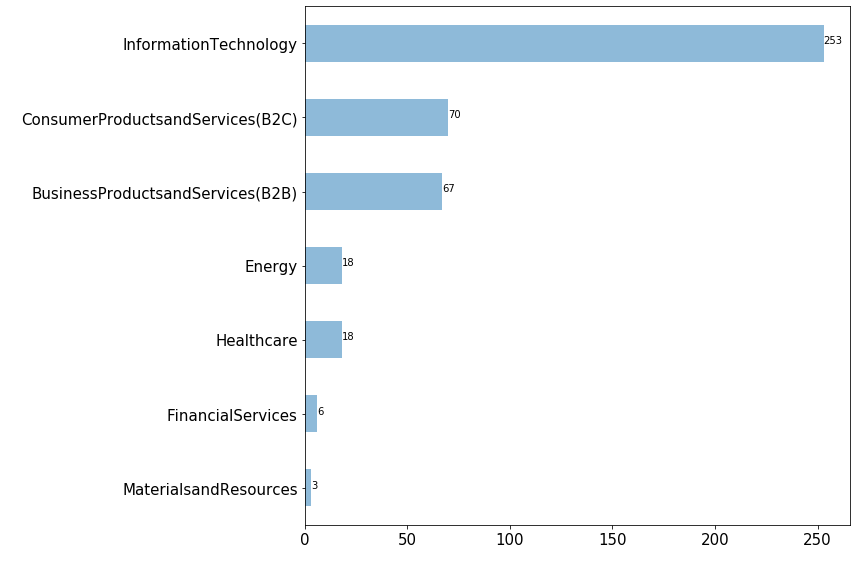

In [17]:
# Create the chart
y = sector_df['number']

sector_df.plot(kind='barh',  x='sector', y='number', figsize=(12, 8), legend=None, fontsize=15, alpha = 0.5)
plt.xlabel(' ')
plt.ylabel(' ')
plt.tight_layout()

for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.savefig('sectors.png')

In [18]:
#Separate the locations into City and States
col=["Company Name","Primary Industry Group","HQ Country","Year Founded"]
year = df[col]
year.head()

,Company Name,Primary Industry Group,HQ Country,Year Founded
0,3Bar Biologics,Pharmaceuticals and Biotechnology,UnitedStates,2013.0
1,3D Hubs,Commercial Services,Netherlands,2013.0
2,4INFO,Commercial Services,UnitedStates,2004.0
3,8i,Software,UnitedStates,2014.0
4,908 Devices,Commercial Products,UnitedStates,2012.0


In [19]:
#Get how many years these companies are open
y = 2019
year_df = pd.DataFrame(year)
final = year_df.assign(old=y - year_df['Year Founded'])
final

,Company Name,Primary Industry Group,HQ Country,Year Founded,old
0,3Bar Biologics,Pharmaceuticals and Biotechnology,UnitedStates,2013.0,6.0
1,3D Hubs,Commercial Services,Netherlands,2013.0,6.0
2,4INFO,Commercial Services,UnitedStates,2004.0,15.0
3,8i,Software,UnitedStates,2014.0,5.0
4,908 Devices,Commercial Products,UnitedStates,2012.0,7.0
...,...,...,...,...,...
430,nCino,Software,UnitedStates,2012.0,7.0
431,toBe Marketing,Software,Japan,2015.0,4.0
432,uAvionix,Commercial Products,UnitedStates,2014.0,5.0
433,uBeam,Computer Hardware,UnitedStates,2011.0,8.0


In [20]:
#Put the oldest companies on the top of the df
final.nlargest(10,['old'])

,Company Name,Primary Industry Group,HQ Country,Year Founded,old
299,Reaction Engines,Commercial Products,UnitedKingdom,1989.0,30.0
311,Savi Technology,Software,UnitedStates,1989.0,30.0
241,NSS Labs,Software,UnitedStates,1991.0,28.0
168,Impartner,Software,UnitedStates,1997.0,22.0
239,Movius,Software,UnitedStates,1999.0,20.0
304,Rhythm Superfoods,Consumer Non-Durables,UnitedStates,1999.0,20.0
400,WellDog,Commercial Services,UnitedStates,1999.0,20.0
404,WideOrbit,Commercial Services,UnitedStates,1999.0,20.0
408,WorkForce Software,Software,UnitedStates,1999.0,20.0
67,Cambridge Broadband Networks,Communications and Networking,UnitedKingdom,2000.0,19.0


In [21]:
#Put the oldest companies on the top of the df
final.nsmallest(10,['old'])

,Company Name,Primary Industry Group,HQ Country,Year Founded,old
32,Atlas Protocol,Software,UnitedStates,2018.0,1.0
20,Amino Payments,Commercial Services,UnitedStates,2017.0,2.0
55,BlockFi,Software,UnitedStates,2017.0,2.0
97,Digital Alloys,Computer Hardware,UnitedStates,2017.0,2.0
115,Evolve Additive Solutions,Software,UnitedStates,2017.0,2.0
132,FortressIQ,Software,UnitedStates,2017.0,2.0
217,Lumina Networks,Software,UnitedStates,2017.0,2.0
244,Neighborhood Goods,Media,UnitedStates,2017.0,2.0
256,Open,Software,India,2017.0,2.0
296,RStor,IT Services,UnitedStates,2017.0,2.0
